# Browser Activity Tracking – Analysis

This notebook demonstrates how processed browsing history data is analyzed and visualized.
The data was prepared using the `etl.py` script, which extracts real or sample Chrome history,
cleans it, and applies clustering to group similar browsing activities.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set(style="whitegrid")

In [2]:
# Load the cleaned and clustered data generated by etl.py
df = pd.read_csv("../data/updated_history.csv")

df.head()

,url,title,last_visit_time,domain,category,hour
0,https://www.booking.com/index.html?aid=1743217,Booking,2025-01-02 23:21:00,booking.com,News,23
1,https://travelsites.com/expedia/,Travelsites,2025-10-30 12:29:00,travelsites.com,News,12
2,https://travelsites.com/tripadvisor/,Travelsites,2025-07-12 05:55:00,travelsites.com,News,5
3,https://www.momondo.in/?ispredir=true,Momondo,2025-03-06 18:26:00,momondo.in,News,18
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,Ebookers,2025-01-20 14:53:00,ebookers.com,News,14


In [3]:
print("Number of records:", len(df))
print("Unique categories:", df['category'].unique())
df.info()


Number of records: 1408
Unique categories: ['News' 'Streaming' 'Game' 'Info' 'Fashion']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              1408 non-null   object
 1   title            1408 non-null   object
 2   last_visit_time  1408 non-null   object
 3   domain           1408 non-null   object
 4   category         1408 non-null   object
 5   hour             1408 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 66.1+ KB


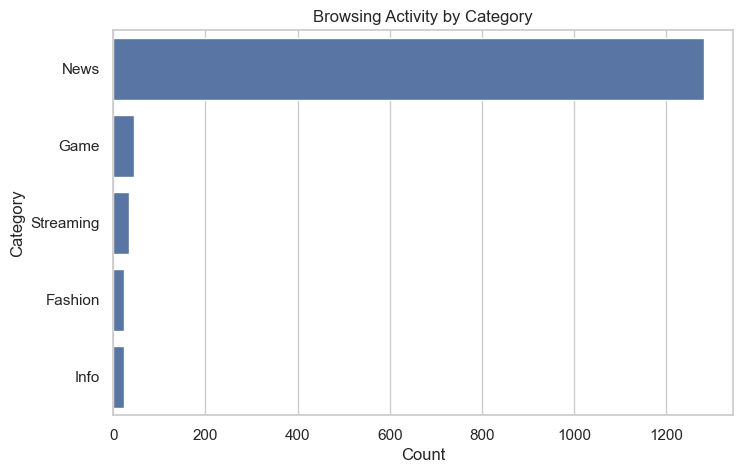

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title("Browsing Activity by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

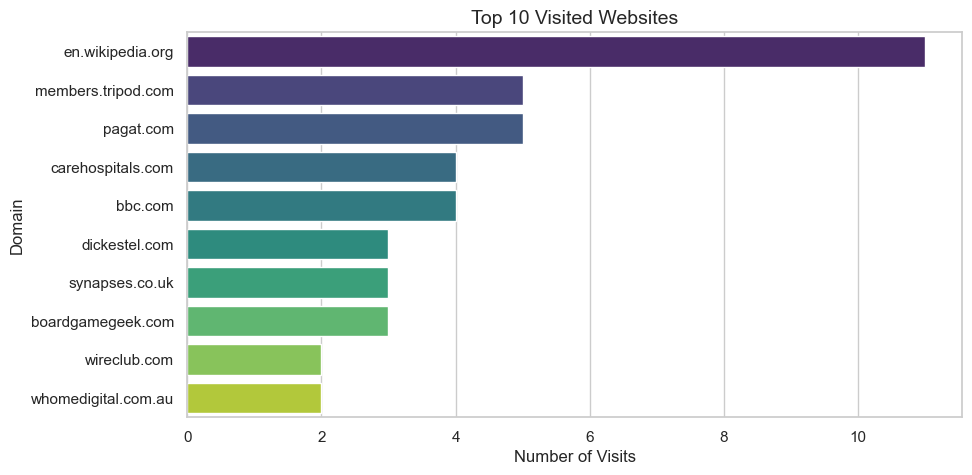

In [13]:
domain_stats = pd.read_csv("../data/summary_domains.csv")
top_domains = domain_stats.sort_values("visits", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_domains, x="visits", y="domain", hue="domain", palette="viridis", legend=False)
plt.title("Top 10 Visited Websites", fontsize=14)
plt.xlabel("Number of Visits")
plt.ylabel("Domain")
plt.show()


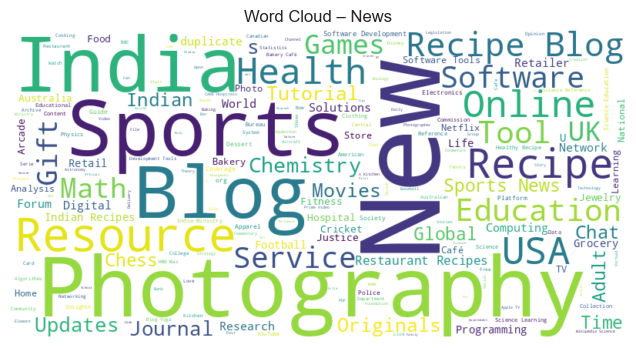

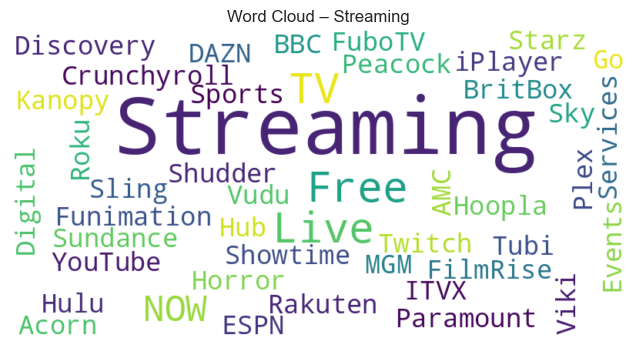

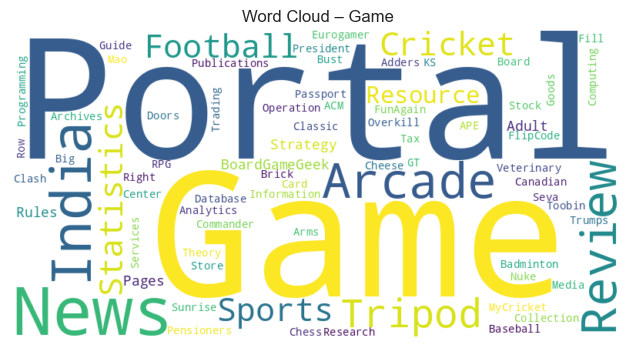

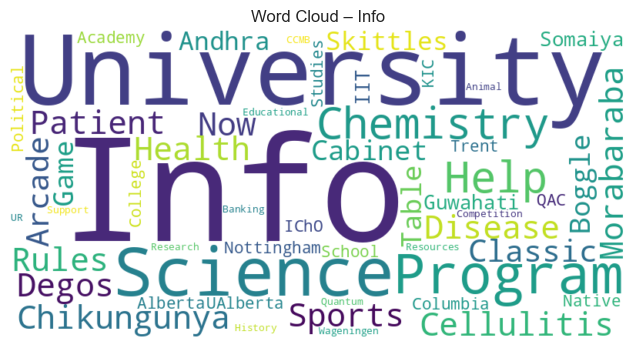

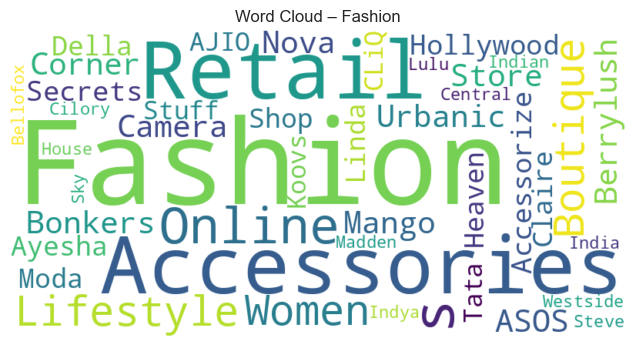

In [6]:
for category in df['category'].unique():
    text = " ".join(df[df['category'] == category]['title'].dropna().values)
    if text.strip():
        wc = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(8,4))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud – {category}")
        plt.show()


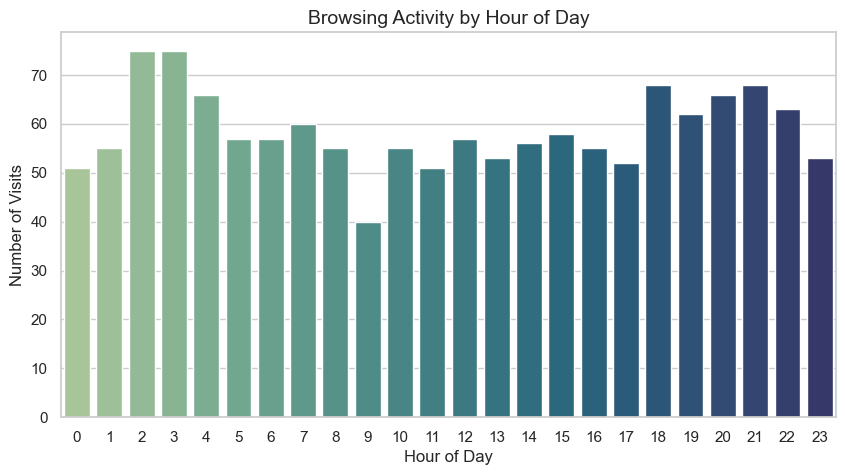

In [9]:
browsing_by_hour = pd.read_csv("../data/summary_browsing_by_hour.csv")
plt.figure(figsize=(10,5))
sns.barplot(data=browsing_by_hour, x="hour", y="count", hue="hour", palette="crest", legend=False)
plt.title("Browsing Activity by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Visits")
plt.xticks(range(0, 24))
plt.show()


### Key Takeaways
- The ETL pipeline automatically cleaned and categorized browsing history.
- This notebook visualizes category distribution, top domains, and time usage trends.
- You can adjust clustering parameters or retrain on new data using etl.py.
- The processed dataset (`updated_history.csv`) can be exported to Power BI for interactive dashboards and presentations.
